<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/Text_Mining_Elon_Musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # For Text Mining assignment
ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
## Import the file
import pandas as pd
df= pd.read_csv("/content/Elon_musk.csv", encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [2]:
Stop_Words = pd.read_csv("/content/stop.txt",error_bad_lines=False)
Stop_Words

<ipython-input-2-06fdb4e12af9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Stop_Words = pd.read_csv("/content/stop.txt",error_bad_lines=False)


,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [3]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df.rename({'Text':'Tweets'},axis=1,inplace=True)
df

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df['word_count'] = df['Tweets'].apply(lambda x: len(str(x).split(" ")))
df[['Tweets','word_count']].head()

,Tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [5]:
df['char_count'] = df['Tweets'].str.len() ## this also includes spaces
df[['Tweets','char_count']].head()

,Tweets,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [13]:
df['hashtags'] = df['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Tweets','hashtags']].head()

,Tweets,hashtags
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [7]:
df['numerics'] = df['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Tweets','numerics']].head()

,Tweets,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [8]:
df['stopwords'] = df['Tweets'].apply(lambda x: len([x for x in x.split() if x in Stop_Words]))
df[['Tweets','stopwords']].head()

,Tweets,stopwords
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [9]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Tweets'].apply(lambda x: avg_word(x))
df[['Tweets','avg_word']].head()

,Tweets,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [10]:
df['upper'] = df['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Tweets','upper']].head()

,Tweets,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [11]:
freq = pd.Series(' '.join(df['Tweets']).split()).value_counts()[-10:]
freq

N3                         1
lab                        1
(N1                        1
detection                  1
Lab                        1
https://t.co/K77wXQ11yt    1
dicey                      1
accurate,                  1
thinks                     1
28                         1
dtype: int64

In [15]:
df.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [16]:
# Total tweets
print('Total tweets this period:', len(df.index), '\n')

Total tweets this period: 1999 



# sentimental analysis

In [18]:
# cleaning the tweets
one_tweet = df.iloc[5]['Tweets']
one_tweet


'Happy New Year of the Ox! https://t.co/9WFKMYu2oj'

In [19]:
def TweetCleaning(tweets):
    Cleantweet=re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
    Cleantweet=re.sub(r"#[a-zA-Z0-9]+"," ",Cleantweet)
    Cleantweet=''.join(word for word in Cleantweet.split() if word not in Stop_Words)
    return Cleantweet

In [20]:
def calPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [21]:
def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

In [22]:
def segmentation(tweets):
    if tweets > 0:
        return "positive"
    elif tweets == 0:
        return "neutral"
    else:
        return "negative"

In [24]:
import re
from textblob import TextBlob

df["Cleanedtweets"]=df["Tweets"].apply(TweetCleaning)
df["Cleanedtweets"]
df["polarity"]=df["Cleanedtweets"].apply(calPolarity)
df["polarity"]
df["subjectivity"]=df["Cleanedtweets"].apply(calSubjectivity)
df["subjectivity"]
df["segmentation"]=df["polarity"].apply(segmentation)
df["segmentation"]

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
1994    neutral
1995    neutral
1996    neutral
1997    neutral
1998    neutral
Name: segmentation, Length: 1999, dtype: object

In [25]:
df.head()

,Tweets,Cleanedtweets,polarity,subjectivity,segmentation
0,@kunalb11 Im an alien,Imanalien,0.0,0.0,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...,0.0,0.0,neutral
2,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,@gtera27 Doge is underestimated,Dogeisunderestimated,0.0,0.0,neutral
4,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaforamazingexecutionla...,0.0,0.0,neutral


# Analysis and visualization sentimental analysis

In [26]:
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,3
neutral,1914
positive,82


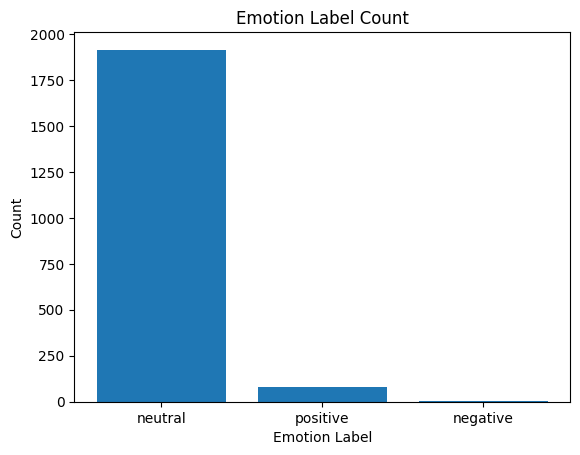

In [27]:
# Plot the bar graph
import matplotlib.pyplot as plt
emotion_counts = df['segmentation'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Emotion Label Count')
plt.show()

In [28]:
# Top three positive tweets
df.sort_values(by=['polarity'],ascending=False).head(3)

,Tweets,Cleanedtweets,polarity,subjectivity,segmentation
1594,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,@lexfridman Nice,Nice,0.6,1.0,positive
1017,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [29]:
# Top three nagative tweets
df.sort_values(by=['polarity'],ascending=True).head(3)

,Tweets,Cleanedtweets,polarity,subjectivity,segmentation
852,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,@OLHZN Minor,Minor,-0.05,0.20,negative
741,@PPathole Strange,Strange,-0.05,0.15,negative


In [30]:
# Top three neutral tweets
df[df['polarity']==0].head(3)

,Tweets,Cleanedtweets,polarity,subjectivity,segmentation
0,@kunalb11 Im an alien,Imanalien,0.0,0.0,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...,0.0,0.0,neutral
2,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


# Text Preprocessing

In [32]:
df

,Tweets,Cleanedtweets,polarity,subjectivity,segmentation
0,@kunalb11 Im an alien,Imanalien,0.0,0.0,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingonCyberpunkwithHDRisnext-...,0.0,0.0,neutral
2,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,@gtera27 Doge is underestimated,Dogeisunderestimated,0.0,0.0,neutral
4,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaforamazingexecutionla...,0.0,0.0,neutral
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...","True,itsoundssosurreal,butthenegativepropagand...",0.0,0.0,neutral
1995,@PPathole Make sure to read ur terms &amp; con...,Makesuretoreadurterms&amp;conditionsbeforeclic...,0.0,0.0,neutral
1996,@TeslaGong @PPathole Samwise Gamgee,SamwiseGamgee,0.0,0.0,neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,AlthoDumbandDumberis<U+0001F525><U+0001F525>,0.0,0.0,neutral


In [33]:
tweets=[Text.strip() for Text in df.Tweets] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [34]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text[:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
book = [x.strip() for x in book.Cleanedtweets] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]


['I\x92manalien',
 '_AA_CarmackRaytracingonCyberpunkwithHDRisnext-level.Haveyoutriedit?',
 'Greatinterview!',
 'Dogeisunderestimated',
 'CongratulationsTeslaChinaforamazingexecutionlastyear.Nowontothenextforevenmore!!',
 'HappyNewYearoftheOx!https://t.co/9WFKMYu2oj',
 'Frodowastheunderdoge,Allthoughthewouldfail,Himselfmostofall.https://t.co/zGxJFDzzrM',
 '_Hahathanks:)',
 'Indeed!Tweetsdefinitelydonotrepresentreal-worldtimeallocation.',
 'Themostentertainingoutcomeisthemostlikely']

In [ ]:
# Joining the list into one string/text
text = ' '.join(book)
text

'I\x92manalien _AA_CarmackRaytracingonCyberpunkwithHDRisnext-level.Haveyoutriedit? Greatinterview! Dogeisunderestimated CongratulationsTeslaChinaforamazingexecutionlastyear.Nowontothenextforevenmore!! HappyNewYearoftheOx!https://t.co/9WFKMYu2oj Frodowastheunderdoge,Allthoughthewouldfail,Himselfmostofall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelydonotrepresentreal-worldtimeallocation. Themostentertainingoutcomeisthemostlikely Justsentsome JustagreetodoClubhousewith https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtsomeDogecoinforlilX,sohecanbetoddlerhodler Hedefinitelyhasissues,butthesentencingseemsbithigh Thanksforfixing Pleaseunlockmyaccount <U+0001F923><U+0001F923> Thisistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletthatwon\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts Yourappsucks RT:NASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewaytogetherononemission!https://t.co/3pWt Yes _Oncewecanpredictcashflowreasonablywell,StarlinkwillIPO _St

In [44]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


In [45]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [46]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [47]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [49]:
#Tokenization
import nltk.data
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [50]:
# Tokens count
len(text_tokens)

17847

In [80]:
# Remove Stopwords


sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
stop_words= list(Stop_Words).extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in Stop_Words]
print(no_stop_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [64]:
#Noramalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['i', '\x92', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china']


In [65]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])
len(stemmed_tokens)

['i', '\x92', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tri', 'it', 'great', 'interview', 'doge', 'is', 'underestim', 'congratul', 'tesla', 'china', 'for', 'amaz', 'execut', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happi', 'new']


17847

In [66]:
import spacy
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
nlp

In [67]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

i  m an alien ray trace on cyberpunk with hdr is nextlevel have you tri it great interview doge is underestim congratul tesla china for amaz execut last year now on to the next for even more happi new


In [68]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])
len(lemmas)

['I', '\x92', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', 'you', 'tri', 'it', 'great', 'interview', 'doge', 'be', 'underestim', 'congratul', 'tesla', 'china']


17870

In [81]:
clean_tweets=' '.join(lemmas)
clean_tweets[:1000]

'I \x92 m an alien ray trace on cyberpunk with hdr be nextlevel have you tri it great interview doge be underestim congratul tesla china for amaz execut last year now on to the next for even more happi new year of the ox frodo wa the underdog all think he would fail himself most of all haha thank inde tweet definit do not repre realworld time alloc the most entertain outcom be the most like just send some just agre to do clubhous with it \x92 s get real buy some dogecoin for lil x so he can be a toddler hodler he definit ha issu but the sentenc seem a bit high thank for fix plea unlock my account u0001f923 u0001f923 thi be true power haha ani crypto wallet that win \x92 t give you your privat key should be avoid at all cost your app suck rt nasa ha select falcon heavi to launch the first two element of the lunar gateway togeth on one mission ye onc we can predict cash flow reason well starlink will ipo starlink be a staggeringli difficult technic econom endeavor howev if we don spacex 

In [69]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [70]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['250kw' '25gunsteslacom' '25k' '25th' '28' '28th' '29' '2k' '2nd' '2v'
 '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800' '394'
 '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445' '448'
 '4530' '4680' '479000' '48' '4d' '4th' '50' '50000' '50k' '60' '60000'
 '65' '69420' '6f' '6k' '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [71]:
print(X.toarray().shape)

(17870, 3214)


In [72]:
# bigram and trigram

vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=(100))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(df["Cleanedtweets"])

In [73]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1930 stored elements in Compressed Sparse Row format>

In [74]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f1e9' '0001f1e9 0001f1ea' '0001f1ea' '0001f3b6' '0001f440'
 '0001f44d' '0001f495' '0001f4af' '0001f525' '0001f525 0001f525'
 '0001f5a4' '0001f600' '0001f609' '0001f622' '0001f680' '0001f923'
 '0001f923 0001f923' '0432' '0435' '043b' '043e' '043e 043b' '20' '200d'
 '2192' '2192 https' '2192 https co' '263a' '2660' '2660 fe0f' '2665'
 '2665 fe0f' '26a1' '26a1 fe0f' '_williams' 'absolutely' 'agreed' 'also'
 'amp' 'buhttps' 'buhttps co' 'but' 'butit' 'butwe' 'can' 'co'
 'comingsoon' 'completingspacex' 'cool' 'doesn' 'doge' 'don' 'exactly'
 'falcon9' 'fe0f' 'forsure' 'goodpoint' 'gt' 'haha' 'hahatrue' 'hopefully'
 'https' 'https co' 'indeed' 'it' 'liftoff' 'liftoff https'
 'liftoff https co' 'long' 'lt' 'no' 'ok' 'prettymuch' 'rt' 'rt falcon9'
 'rt https' 'rt https co' 'rt liftoff' 'rt liftoff https' 'rt news'
 'rt_crew' 'shttps' 'shttps co' 'sigh' 'sorry' 'spacex' 'sure'
 'technically' 'term' 'thanks' 'that' 'there' 'they' 'true' 'we' 'well'
 'wow' 'yeah' 'yes' 'yup']
[[0 0 0 ... 0 0

In [75]:
# TFidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['polarity']
[[1.]]
